In [1]:
#Libraries Required
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Dense, LSTM, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(2)
import time
import datetime

In [2]:
# Change Directory
os.chdir(r"C:\Users\irfan\Desktop\SPEED")

FirstInc = read_csv('Primary_incidents(1).csv')
SecondInc = read_csv('Secondary Incident Detection(1).csv')
All_Primary = pd.concat([FirstInc, SecondInc])
All_Primary = All_Primary.drop_duplicates(['Date'])
All_Primary.Date = pd.to_datetime(All_Primary.Date)
All_Primary['datemod'] = All_Primary.Date.dt.round('5min')
All_Primary = All_Primary.drop(columns = ['Date'])

In [5]:
print(All_Primary.head())
print(All_Primary.shape)

    ID  Severity       tmcN       tmcP Type of Collision  Latitude  longitude  \
0   56         1  111N04906  111P04906    SIDESWIPE-SAME   35.3336   -97.4900   
1   65         1  111-04904  111P04905     ANGLE-TURNING   35.3197   -97.4899   
2   71         2  111N04907  111P04907     ANGLE-TURNING   35.3474   -97.4945   
3  355         2  111N04907  111+04908       RIGHT-ANGLE   35.3486   -97.4946   
4  366         1  111N04909  111P04909          REAR-END   35.3641   -97.4948   

              datemod  
0 2017-01-01 20:20:00  
1 2017-01-06 08:05:00  
2 2017-01-04 12:40:00  
3 2017-01-11 15:10:00  
4 2017-01-09 19:40:00  
(3783, 8)


In [6]:
All_Primary['Hours'] = (All_Primary.datemod.dt.hour).astype('category')
All_Primary['Months'] = (All_Primary.datemod.dt.month).astype('category')
All_Primary['Day'] = (All_Primary.datemod.dt.dayofweek).astype('category')
Segment1 = (All_Primary.tmcP).astype('category')
Segment2 = (All_Primary.tmcN).astype('category')
Segmentcount = pd.concat([Segment1, Segment2], axis=0)

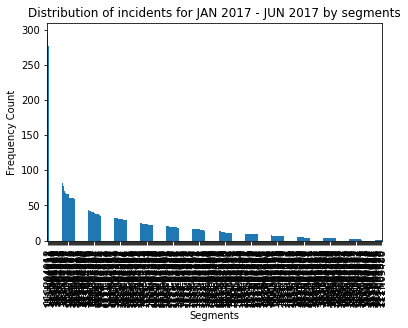

In [7]:
#Lets check segment distributions of the incidents
title='Distribution of incidents for JAN 2017 - JUN 2017 by segments'
ylabel='Frequency Count'
xlabel='Segments'
fig, ax = plt.subplots()
Segmentcount.value_counts().plot(kind='bar', ax=ax, title=title) 
ax.set(xlabel=xlabel, ylabel=ylabel); 
plt.show()

In [9]:
Segment_Freq = Segmentcount.value_counts()
print(Segment_Freq.to_string())

111P04912    295
111N04912    277
111+04921    193
111N04922    157
111-04920    155
111N04920    151
111P04922    143
111P04920    131
111P04905    125
111N05151    120
111P05151    115
111-04904    114
111P04928    112
111N04928    110
111P04906     82
111N04907     77
111N04906     71
111-05401     68
111P04907     66
111N04923     66
111P04923     66
111-04915     61
111+04916     61
111+05402     61
111N04914     60
111-05622     60
111+05623     59
111P04917     58
111P04914     58
111N04917     58
111P04909     56
111N04897     53
111P04900     52
111N04905     47
111+04896     46
111N04900     46
111P04897     46
111P05156     45
111N04909     44
111N04910     43
111N05156     42
111P04910     42
111P04924     40
111+05485     40
111-04903     40
111-05484     39
111P05401     38
111N05155     38
111N05401     38
111P05155     38
111-04906     36
111+04914     35
111+05503     35
111+04895     35
111+05492     35
111-05494     35
111N04924     34
111-05629     34
111-05403     

In [10]:
All_Primary['Hours'] = (All_Primary.datemod.dt.hour).astype('category')
All_Primary['Months'] = (All_Primary.datemod.dt.month).astype('category')
All_Primary['Day'] = (All_Primary.datemod.dt.dayofweek).astype('category')
print(All_Primary.head())
print(All_Primary.shape)

    ID  Severity       tmcN       tmcP Type of Collision  Latitude  longitude  \
0   56         1  111N04906  111P04906    SIDESWIPE-SAME   35.3336   -97.4900   
1   65         1  111-04904  111P04905     ANGLE-TURNING   35.3197   -97.4899   
2   71         2  111N04907  111P04907     ANGLE-TURNING   35.3474   -97.4945   
3  355         2  111N04907  111+04908       RIGHT-ANGLE   35.3486   -97.4946   
4  366         1  111N04909  111P04909          REAR-END   35.3641   -97.4948   

              datemod Hours Months Day  
0 2017-01-01 20:20:00    20      1   6  
1 2017-01-06 08:05:00     8      1   4  
2 2017-01-04 12:40:00    12      1   2  
3 2017-01-11 15:10:00    15      1   2  
4 2017-01-09 19:40:00    19      1   0  
(3783, 11)


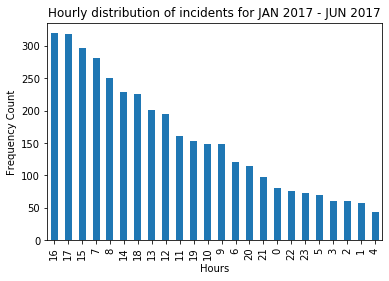

In [11]:
#Lets check hourly distributions of the incidents
title='Hourly distribution of incidents for JAN 2017 - JUN 2017'
ylabel='Frequency Count'
xlabel='Hours'
fig, ax = plt.subplots()
All_Primary.Hours.value_counts().plot(kind='bar', ax=ax, title=title) 
ax.set(xlabel=xlabel, ylabel=ylabel); 
plt.show()

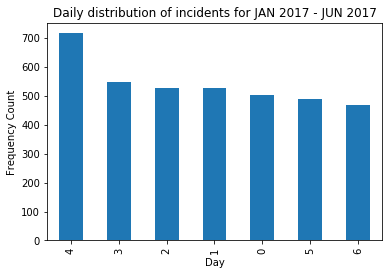

In [15]:
#Lets check day of week distributions of the incidents
title='Daily distribution of incidents for JAN 2017 - JUN 2017'
ylabel='Frequency Count'
xlabel='Day'
fig, ax = plt.subplots()
All_Primary.Day.value_counts().plot(kind='bar', ax=ax, title=title) 
ax.set(xlabel=xlabel, ylabel=ylabel); 
plt.show()

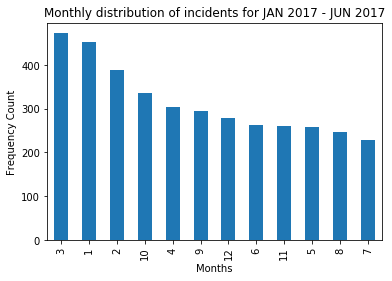

In [16]:
#Lets check monthly distributions of the incidents
title='Monthly distribution of incidents for JAN 2017 - JUN 2017'
ylabel='Frequency Count'
xlabel='Months'
fig, ax = plt.subplots()
All_Primary.Months.value_counts().plot(kind='bar', ax=ax, title=title )  
ax.set(xlabel=xlabel, ylabel=ylabel);
plt.show()

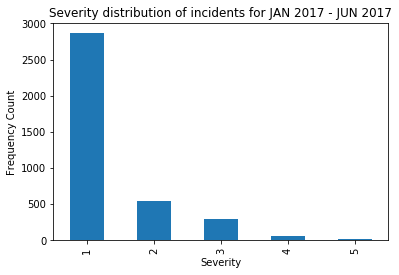

In [17]:
#Lets check monthly distributions of the incidents
title='Severity distribution of incidents for JAN 2017 - JUN 2017'
ylabel='Frequency Count'
xlabel='Severity'
fig, ax = plt.subplots()
All_Primary.Severity.value_counts().plot(kind='bar', ax=ax, title=title )  
ax.set(xlabel=xlabel, ylabel=ylabel);
plt.show()